In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.model_selection import GridSearchCV

import comptools as comp

%matplotlib inline

In [2]:
# Load simulation data and pipeline
df_sim_train, df_sim_test = comp.load_sim(config='IC86.2012')
feature_list, feature_labels = comp.analysis.get_training_features()
pipeline = comp.get_pipeline('BDT')

Starting out with 108522 sim events
sim quality cut event flow:
      passed_IceTopQualityCuts:    1.0    1.0
FractionContainment_Laputop_InIce:  0.793  0.793
       passed_InIceQualityCuts:  0.795   0.76
                 num_hits_1_60:  0.997  0.759
             reco_energy_range:  0.874  0.662




In [3]:
pipeline.get_params().keys()

['classifier__min_impurity_split',
 'classifier__max_features',
 'classifier__subsample',
 'classifier__max_depth',
 'classifier__min_samples_split',
 'classifier__learning_rate',
 'classifier__min_samples_leaf',
 'classifier__criterion',
 'classifier__loss',
 'classifier__n_estimators',
 'classifier__max_leaf_nodes',
 'steps',
 'classifier__warm_start',
 'classifier__verbose',
 'classifier__presort',
 'classifier__min_weight_fraction_leaf',
 'classifier',
 'classifier__random_state',
 'classifier__init']

In [21]:
parameters = {'classifier__max_depth': range(1, 8), 
              'classifier__n_estimators':[5, 10, 20, 50, 100, 200, 300, 400, 500, 600]}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=25, verbose=2)
grid_search.fit(df_sim_train[feature_list], df_sim_train['target'])

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV]  classifier__n_estimators=5, classifier__max_depth=1, total=   0.1s
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=50, classifier__max_depth=1 ............
[CV]  classifier__n_estimators=5, classifier__max_depth=1, total=   0.1s
[CV]  classifier__n_estimators=5, classifier__max_depth=1, total=   0.1s
[CV] clas

[CV]  classifier__n_estimators=20, classifier__max_depth=3, total=   1.4s
[CV] classifier__n_estimators=300, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   7.3s
[CV] classifier__n_estimators=300, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=1, total=   9.8s
[CV] classifier__n_estimators=400, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=1, total=  10.0s
[CV]  classifier__n_estimators=50, classifier__max_depth=3, total=   2.6s
[CV] classifier__n_estimators=50, classifier__max_depth=3 ............
[CV] classifier__n_estimators=500, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   8.0s
[CV] classifier__n_estimators=500, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   8.1s
[CV] classifier__n_estimators=600, classifier__max_

[CV] classifier__n_estimators=100, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=3, total=  10.2s
[CV] classifier__n_estimators=100, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=5, total=   6.5s
[CV] classifier__n_estimators=100, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=5, total=   5.7s
[CV] classifier__n_estimators=200, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=5, total=   5.5s
[CV] classifier__n_estimators=200, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=4, total=  14.1s
[CV] classifier__n_estimators=200, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=3, total=  25.2s
[CV] classifier__n_estimators=600, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=500, classifier__max_dept

[Parallel(n_jobs=25)]: Done 140 tasks      | elapsed:  1.1min


[CV]  classifier__n_estimators=400, classifier__max_depth=4, total=  27.9s
[CV] classifier__n_estimators=400, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=6, total=   6.5s
[CV] classifier__n_estimators=400, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=600, classifier__max_depth=3, total=  30.7s
[CV] classifier__n_estimators=400, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=300, classifier__max_depth=5, total=  28.9s
[CV] classifier__n_estimators=500, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=6, total=  11.8s
[CV] classifier__n_estimators=500, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=6, total=  10.8s
[CV] classifier__n_estimators=500, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=6, total=  12.5s
[CV] classifier__n_estimators=600, classifier__max

[Parallel(n_jobs=25)]: Done 161 out of 210 | elapsed:  1.4min remaining:   24.8s


[CV]  classifier__n_estimators=10, classifier__max_depth=7, total=   1.9s
[CV] classifier__n_estimators=20, classifier__max_depth=7 ............
[CV]  classifier__n_estimators=400, classifier__max_depth=5, total=  39.9s
[CV] classifier__n_estimators=20, classifier__max_depth=7 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=7, total=   4.3s
[CV] classifier__n_estimators=50, classifier__max_depth=7 ............
[CV]  classifier__n_estimators=200, classifier__max_depth=6, total=  21.5s
[CV] classifier__n_estimators=50, classifier__max_depth=7 ............
[CV]  classifier__n_estimators=200, classifier__max_depth=6, total=  23.2s
[CV] classifier__n_estimators=50, classifier__max_depth=7 ............
[CV]  classifier__n_estimators=500, classifier__max_depth=4, total=  34.2s
[CV]  classifier__n_estimators=200, classifier__max_depth=6, total=  24.0s
[CV] classifier__n_estimators=100, classifier__max_depth=7 ...........
[CV] classifier__n_estimators=100, classifier__max_

[Parallel(n_jobs=25)]: Done 210 out of 210 | elapsed:  2.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=2,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=25,
       param_grid={'classifier__n_estimators': [5, 10, 20, 50, 100, 200, 300, 400, 500, 600], 'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [22]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [23]:
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__max_depth,param_classifier__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.085840,0.003514,0.621936,0.622572,1,5,"{u'classifier__n_estimators': 5, u'classifier_...",70,0.619156,0.622730,0.626230,0.621101,0.620422,0.623885,0.010361,0.000252,0.003080,0.001142
1,0.156466,0.004797,0.627642,0.627771,1,10,"{u'classifier__n_estimators': 10, u'classifier...",69,0.627564,0.627799,0.630703,0.626260,0.624657,0.629253,0.026888,0.001594,0.002469,0.001222
2,0.417210,0.008548,0.641498,0.642482,1,20,"{u'classifier__n_estimators': 20, u'classifier...",68,0.641818,0.644142,0.643943,0.638218,0.638733,0.645087,0.065861,0.000421,0.002139,0.003040
3,1.233306,0.014321,0.660186,0.661349,1,50,"{u'classifier__n_estimators': 50, u'classifier...",65,0.657204,0.659380,0.668098,0.662462,0.655255,0.662204,0.023350,0.000409,0.005651,0.001396
4,2.426882,0.023917,0.704479,0.709201,1,100,"{u'classifier__n_estimators': 100, u'classifie...",64,0.706524,0.721647,0.710443,0.703763,0.696469,0.702192,0.075354,0.000556,0.005885,0.008824
5,4.776636,0.056100,0.733942,0.738753,1,200,"{u'classifier__n_estimators': 200, u'classifie...",58,0.726085,0.739630,0.741397,0.739071,0.734343,0.737558,0.112346,0.020663,0.006257,0.000875
6,7.405296,0.060576,0.741297,0.746079,1,300,"{u'classifier__n_estimators': 300, u'classifie...",54,0.736522,0.747473,0.744319,0.745065,0.743051,0.745699,0.074435,0.003472,0.003416,0.001019
7,10.238708,0.086743,0.744657,0.749051,1,400,"{u'classifier__n_estimators': 400, u'classifie...",47,0.740219,0.750753,0.747540,0.747987,0.746213,0.748412,0.598307,0.015932,0.003185,0.001216
8,13.827892,0.091666,0.747142,0.750860,1,500,"{u'classifier__n_estimators': 500, u'classifie...",41,0.741830,0.752990,0.749747,0.749657,0.749851,0.749933,1.416564,0.000770,0.003757,0.001510
9,15.605846,0.124341,0.747162,0.751377,1,600,"{u'classifier__n_estimators': 600, u'classifie...",40,0.741889,0.753228,0.749985,0.750045,0.749612,0.750857,1.115718,0.020743,0.003732,0.001351


In [24]:
pivot_test_score = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_test_score")
pivot_test_score

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.621936,0.627642,0.641498,0.660186,0.704479,0.733942,0.741297,0.744657,0.747142,0.747162
2,0.645295,0.660086,0.727580,0.742291,0.746526,0.749051,0.749647,0.749985,0.749846,0.749965
3,0.706209,0.715453,0.737301,0.746506,0.749945,0.750323,0.751098,0.750422,0.750482,0.749687
4,0.729707,0.736168,0.742888,0.748991,0.750482,0.750601,0.750124,0.749289,0.749508,0.748315
5,0.731516,0.742291,0.746427,0.750104,0.750979,0.749846,0.749210,0.748633,0.748633,0.748196
6,0.737898,0.744438,0.747997,0.751039,0.750959,0.750840,0.750184,0.749031,0.748832,0.747301
7,0.741914,0.746924,0.750005,0.752371,0.752013,0.750939,0.749031,0.747341,0.745930,0.744081


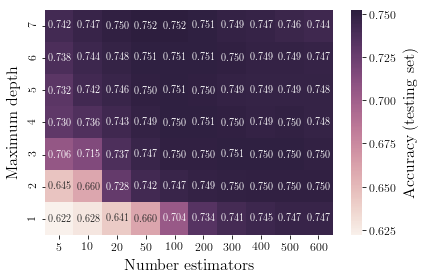

In [56]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_score, annot=True, fmt='0.3f', ax=ax,
            cbar_kws={"label": "Accuracy (testing set)"}, robust=False, square=False)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
    
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap.png')
plt.savefig(outfile)
plt.show()

In [40]:
pivot_train_score = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_train_score")
pivot_train_score

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.622572,0.627771,0.642482,0.661349,0.709201,0.738753,0.746079,0.749051,0.750860,0.751377
2,0.645136,0.663247,0.731407,0.747580,0.751933,0.754756,0.757112,0.757987,0.759100,0.759707
3,0.710413,0.721377,0.743842,0.753027,0.756585,0.759567,0.762629,0.765213,0.767679,0.770482
4,0.737192,0.742222,0.750075,0.756923,0.760591,0.765830,0.770859,0.775909,0.780611,0.785452
5,0.740254,0.749230,0.755224,0.761267,0.766376,0.774329,0.782201,0.790332,0.797420,0.804189
6,0.749289,0.755562,0.760899,0.768524,0.775114,0.786982,0.799010,0.809795,0.820630,0.830997
7,0.759736,0.764160,0.768901,0.777897,0.786605,0.804070,0.819954,0.834486,0.848005,0.861732


In [49]:
overfitting_pivot = (pivot_train_score - pivot_test_score)/pivot_test_score * 100
overfitting_pivot

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.102287,0.020586,0.153401,0.176158,0.670250,0.655510,0.644982,0.590013,0.497583,0.564088
2,-0.024640,0.478879,0.525998,0.712413,0.724351,0.761721,0.995812,1.066935,1.234162,1.298910
3,0.595402,0.828057,0.887107,0.873504,0.885404,1.232052,1.535167,1.971021,2.291395,2.773804
4,1.025745,0.822313,0.967407,1.059059,1.347023,2.028820,2.764235,3.552670,4.149763,4.962678
5,1.194447,0.934710,1.178559,1.488170,2.050301,3.265021,4.403495,5.570018,6.516721,7.483730
6,1.543776,1.494157,1.724920,2.328079,3.216502,4.813603,6.508550,8.112381,9.587975,11.199793
7,2.402266,2.307634,2.519488,3.392791,4.599891,7.075162,9.468647,11.660731,13.684342,15.811698


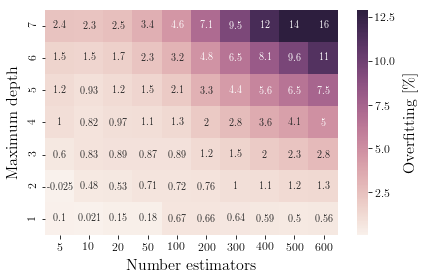

In [55]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(overfitting_pivot, annot=True, ax=ax,
            cbar_kws={"label": "Overfitting [\%]"}, robust=True, square=False)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
    
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap-overfitting.png')
plt.savefig(outfile)
plt.show()

In [26]:
pivot_test_std = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "std_test_score")
pivot_test_std

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.003080,0.002469,0.002139,0.005651,0.005885,0.006257,0.003416,0.003185,0.003757,0.003732
2,0.007733,0.003206,0.005931,0.003669,0.002752,0.002138,0.002679,0.002830,0.002979,0.002821
3,0.005536,0.006651,0.004217,0.003282,0.003179,0.002918,0.002821,0.002856,0.002614,0.003038
4,0.005557,0.002186,0.003489,0.002339,0.002752,0.002099,0.002318,0.001838,0.002429,0.002431
5,0.006438,0.003294,0.003213,0.003173,0.003208,0.002681,0.002510,0.002268,0.002257,0.001937
6,0.004755,0.003139,0.003163,0.002632,0.002173,0.002125,0.001022,0.000870,0.001514,0.001624
7,0.002718,0.002032,0.001418,0.001874,0.001463,0.001406,0.002163,0.001278,0.001825,0.003261


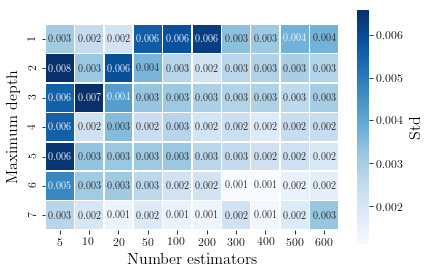

In [58]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_std, annot=True, fmt='0.3f', linewidths=.5, cmap='Blues', ax=ax,
            cbar_kws={"label": "Std"}, robust=True, square=True)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
plt.show()

In [28]:
pivot_test_rank = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "rank_test_score")
pivot_test_rank

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,70,69,68,65,64,58,54,47,41,40
2,67,66,61,51,43,28,24,18,21,19
3,63,62,56,44,20,13,3,12,10,23
4,60,57,50,31,10,9,15,26,25,35
5,59,51,45,16,5,21,27,33,33,36
6,55,48,37,4,6,8,14,29,32,39
7,53,42,17,1,2,7,29,38,46,49


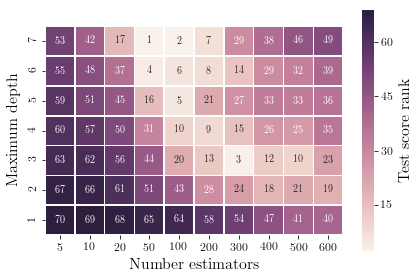

In [60]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_rank, annot=True, fmt='d', linewidths=.5, ax=ax,
            cbar_kws={"label": "Test score rank"}, robust=True, square=True)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap-test-rank.png')
plt.savefig(outfile)
plt.show()

In [38]:
pivot_fit_time = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_fit_time")
pivot_fit_time

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.085840,0.156466,0.417210,1.233306,2.426882,4.776636,7.405296,10.238708,13.827892,15.605846
2,0.362924,0.470188,0.976028,1.960830,4.046361,7.752106,12.424735,16.162673,19.165596,22.001464
3,0.348489,0.699079,1.306321,2.648289,5.063795,10.920575,15.316402,19.740241,25.356442,31.004164
4,0.503584,0.849972,1.552450,3.626678,7.292469,13.751921,21.783734,29.097459,33.550691,41.113244
5,0.624281,1.023849,2.479145,5.850835,9.449213,20.094617,26.445346,35.696560,44.331214,50.330930
6,0.635420,1.433856,3.237326,6.179329,11.594199,22.746604,34.114647,45.206081,53.259440,57.989355
7,1.037183,2.052350,3.873062,8.712433,16.492444,28.034667,35.214703,40.674945,44.037980,47.658691


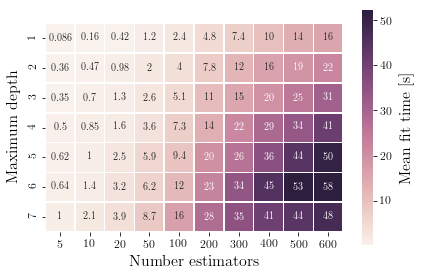

In [39]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_fit_time, annot=True, linewidths=.5, ax=ax,
            cbar_kws={"label": "Mean fit time [s]"}, robust=True, square=True)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
plt.show()